## BayesFit Documentation

If you found this module useful, please let me know on LinkedIn (https://www.linkedin.com/in/michael-slugocki-35b44190/) or GitHub (https://github.com/slugocm).  As a graduate student, all the recognition matters.  Thank you, and I hope you all enjoy! 

Within this document, I will explain how to use the BayesFit module to fit psychometric functions.  The module itself uses very few functions, but contains a wealth of functionality, and makes use of the power of pystan and Stan. Without further ado, let us jump right in! 

We first import the modules we need for this example via the following lines of code:

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our new bayesfit module
import bayesfit as bf


//anaconda/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


For this example, we import the sample data set included with BayesFit located in the folder */bayesfit/data/sample_data.csv*.  If you are unable to located this file, simply download it directly from https://github.com/slugocm/bayesfit/data/sample_data.csv  This method was chosen, as it is likely many users will be importing data from .csv files using Pandas module.  

In [4]:
# Import data as data frame into working environment using pandas
data = pd.read_csv('data.csv')

Here is a very quick plot of the data we have just imported:

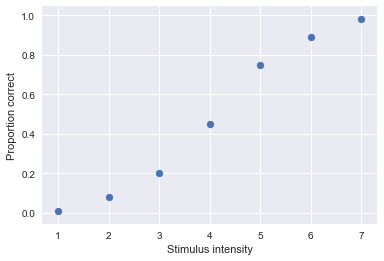

In [5]:
# Generate simple plot of data
plt.scatter(data.x, data.y)
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct')

Next, we will initialize the options that we would like to specify when fitting out psychometric function to our data set. BayesFit makes available to the user a variety of options to help provide the tools needed, while not bogging down the user with too many difficult decisions.  At each step along the way, I will describe all the options that are available to the user to find the best fitting curve. 

In [6]:
# Initialize options variable as dictionary type
# At minimum, you need to provide an empty dictionary structure for the options
options = dict()

# Determines the value of gamma (guess rate) to which the function is fit (default = 2)
options['nAFC'] = 0

# Determines the type of sigmoidal curve that is fit to the data (default = 'cnorm')
# sigmoidTypes available:
# 'cnorm' - Cumulative normal distribution
# 'logistic' - Logistic distribution
# 'cauchy' - Cauchy distribution
# 'gumbel' - Gumbel distribution
# ''
options['sigmoidType'] = 'weibull'

# Determines whether the lapse rate is allowed to vary, or is fixed at zero.  
# This value can be set to either be 'True' or 'False'. (Default: True) 
options['lapse'] = True

# Determines whether the Stan model is compiled automatically by the program, or
# whether the user would like to provide this definition manually.  Theerfore,
# definition can be set to either 'auto' or 'manual'. If manual definition is chosen, 
# a full model deinition must be provided to the function as a chacracter file. 
# Please see Stan documentation if mnually defining model, which is highly discouraged. 
options['fit'] = 'auto'

We now feed our *data* and *options* to the **bayesfit_build** function part of the BayesFit module.  What this function does is compile the model in C++ code so that pystan can use it to sample the posterior distributions using Stan.  Windows users may run into problems running this function.  See the additional instructions posted on repository for BayesFit on GitHub if you run into compiler issues as a Windows user.   

**This step may take a minute or two, but has to be done only once unless you change the type of function you would like to fit!** 

In [7]:
# Build our model definition
model = bf.bayesfit_build(data, options)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a01a75a870b5d5abd2c475e82861a44e NOW.


The model has now been defined!  We just need to sample from the posterior distributions via the following code below, making full use of pystan and Stan.  There are also two options available to pass to BayesFit to slightly change the fit.  See pystan documentation for more information about iteration number and chains when generating samples from Stan models.  

In [8]:
# Number of iterations (default = 5000)
options['iter'] = 5000

# Number of chains (default = 2)
options['chains'] = 2

# Generate samples
fit = bf.bayesfit_fit(data,options,model)

To examine parameter estimates from the samples at a glance, we use: 

In [9]:
print(fit)

Inference for Stan model: anon_model_a01a75a870b5d5abd2c475e82861a44e.
2 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=5000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha    4.41  4.2e-3   0.24   3.95   4.25   4.41   4.57   4.89   3256    1.0
beta     3.59    0.01   0.66   2.48   3.14   3.54   3.97   5.02   3392    1.0
lambda   0.05  5.3e-4   0.03 6.6e-3   0.03   0.04   0.07   0.13   3505    1.0
lp__   -55.44    0.03    1.3 -58.78 -56.02 -55.09  -54.5 -53.99   2033    1.0

Samples were drawn using NUTS at Mon Oct  2 01:14:10 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


However, here we instead use the **bayesfit_extract** function which returns parameter estimates in a Pandas data frame object, and an estimate of **threshold**.  Also, we can pass this extracted object to **bayesfit_plot** to generate some nice looking plots which we will see in a moment. 

In [10]:
# Value of stimulus intensity to return that corresponds to defined 
# performance level of proportion correct 
options['thresholdPC'] = .75

# Here we extract our parameter estimates and estimate of threshold
params, threshold = bf.bayesfit_extract(data, options, fit)

# We print the parameter estimates to screen 
print(params)

      alpha      beta    lambda       lp__
0  4.409507  3.592969  0.050165 -55.443498


In [11]:
# We print our estimate of threshold onscreen
print(threshold)

4.989391346905756


The last thing that we will do is generate some plots based upon the samples we have drawn from our fits.  It is also extremely important to check that the parameter estimates for our psychometric function are reasonable, and fit the data well. We use the function **bayesfit_plot** to generate one of four separate plot types.

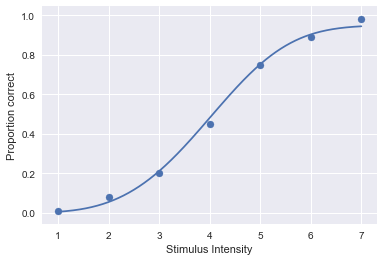

In [12]:
# First, we will generate a figures with our data and a cdf of our fitted function (default = 'cdf')
options['plot'] = 'cdf'

# Next, we use our plotting function and feed it the optional plot we defined above
# along with all other necessary input arguments
bf.bayesfit_plot(data, options, fit, params) 

As you can see, our fitted function is very good given our data! Getting parameter estimates for a function fit, along with extracting a estimate of threshold, is likely the primary use most users will employ this module for.  However, I also provide three other plots for more closely examining the sample and parameter estimates.  These include a joint distribution plot for function parameters, density histograms of sample draws for each parameter, and trace plots. 

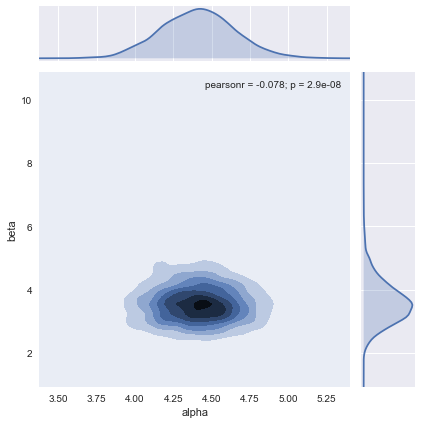

In [13]:
# Joint distribution:
options['plot'] = '2D_density'
bf.bayesfit_plot(data, options, fit, params) 

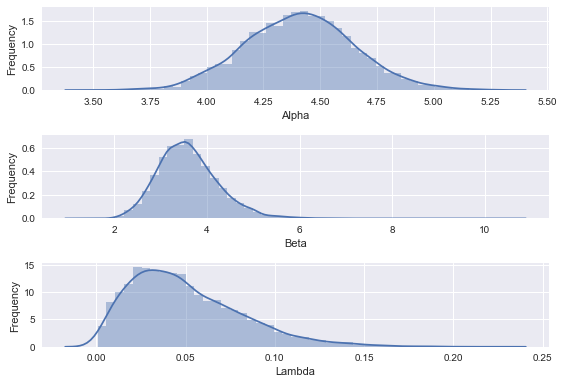

In [14]:
# Density distributions:
options['plot'] = 'density'
bf.bayesfit_plot(data, options, fit, params) 

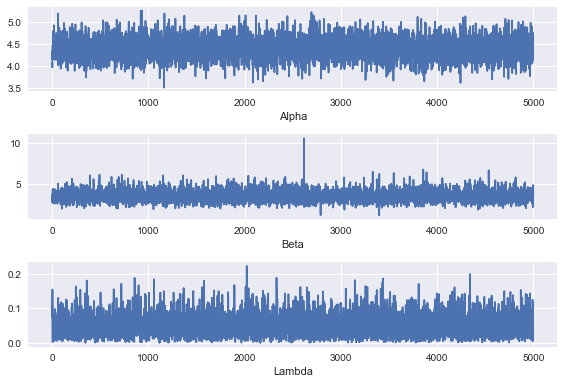

In [15]:
# Trace plots:
options['plot'] = 'trace'
bf.bayesfit_plot(data, options, fit, params) 

** THANK YOU FOR USING THE BAYESFIT MODULE!!!.**  

**IF YOU HAVE ANY QUESTIONS OR ISSUES, PLEASE DO NOT HESITATE TO LET ME KNOW.  ALSO, IF YOU FOUND THIS MODULE USEFUL, PLEASE SHOW YOUR APPRECIATION IN WHATEVER WAY YOU CAN. ** 

** KINDEST REGARDS,** 
**-MICHAEL SLUGOCKI-**